In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sys
from sklearn.cluster import KMeans

In [2]:
# Remove the outliers
def remove_outliers(file_path):
    # return the list of dataframes
    dataframe_lists = []
    # Creating the dataframe and selecting the required columns
    for i in range(20):
        df = pd.read_csv(file_path, usecols=[1,2,3,4], skiprows=i*72000, nrows = 72000, names=["lz","X","Y","Z"])
        df['radiusSquare'] = df['X']*df['X']+df['Y']*df['Y']+df['Z']*df['Z']
        df['radius'] = np.sqrt(df['radiusSquare']).round(1)
        df['freq'] = df.groupby(['lz','radius'])['radius'].transform('count')
        for j in range(64):
            maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
            while maxfreq>100:
                df.drop(df[(df['lz']==j) & (df['freq']==maxfreq)].index, inplace=True)
                maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
                df.drop(df[(df['lz']==j) & (df['radius']==0)].index, inplace=True)
        dataframe_lists.append(df.iloc[:,1:4])
    return dataframe_lists

In [3]:
# atm = remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_initial_dataset/Atm/in.csv")

# This the second data set that contains multiple objects
allData= remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/in.csv")

for i in range(20):
    print(allData[i]['X'].min() , allData[i]['X'].max())
    print(allData[i]['Z'].min() , allData[i]['Z'].max())
# min is -120  and max is 120 


-110.079773 99.703156
-119.380234 116.802673
-115.195 112.836441
-108.420158 110.719475
-94.480522 101.148933
-119.451668 118.771019
-115.498901 116.871895
-84.508873 88.650444
-113.325226 119.297836
-84.508873 113.46001399999999
-118.925529 88.583054
-119.597282 88.650444
-119.80186499999999 116.199532
-94.16327700000001 110.686752
-118.792603 93.706863
-119.126976 117.38418600000001
-111.93838500000001 119.624825
-119.00476100000002 116.842735
-112.967575 114.216225
-116.169785 118.374329
-111.030449 119.540085
-119.43854499999999 111.695618
-119.53273 119.643303
-101.152969 119.45645900000001
-118.16638200000001 117.353897
-119.063507 119.329567
-101.63906899999999 104.751335
-84.508873 111.892303
-108.26624299999999 101.85449200000001
-114.96280700000001 113.912376
-119.19760900000001 100.059875
-114.20552099999999 107.60929099999998
-96.92002099999999 110.001999
-117.207001 108.20092
-105.217751 112.511124
-114.989571 117.711891
-117.77366599999999 94.884445
-119.440628 118.976425

In [4]:
def isInt(value):
    try:
        int(value)
        return True
    except:
        return False


numOfObjects = []

# Out put data.
# We need to get the number of objects. 
pathOutput="/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/out.csv"

with open(pathOutput) as fp:  
   line = fp.readline()
   cnt = 1
   while line:
    # print("Line {}: {}".format(cnt, line.strip()))
        lineArr=line.split(",")
        num = 0
        for index in range(1, len(lineArr)):
            if(isInt(lineArr[index])):
               num +=int(lineArr[index])
        numOfObjects.append(num)
        #print(line.split(",")[1])
        line = fp.readline()
        cnt += 1
        
        
        
print(max(numOfObjects))

print("-------------")
for i in range(10):
    print(numOfObjects[i])


50
-------------
33
25
25
17
16
34
35
20
17
32


In [5]:
def transformToSuperCells(x, y, minValue=-120, maxValue=120, cuttOff=30, cellSize=1):
    # We divid the array by cell size and calculate the 
    # for x 
    x1= np.remainder(x , cellSize)
    xTransformed = x - x1
    # print(x.size)
    # print(xTransformed.size)

    # for y 
    y1= np.remainder(y , cellSize)
    yTransformed = y - y1
    # print(yTransformed.size)
    
    
    # count up values to check the frequency of data in the same cell. 
    all_tuples = tuple(map(tuple, np.column_stack((xTransformed, yTransformed))))

    dictCount={} 

    for i in all_tuples:
        if(i in dictCount):
            dictCount[i] += 1
        else:
            dictCount[i] = 1


    # print(dictCount)
    # print(dictCount.values())
    # values = np.asarray(dictCount.values())

    values = np.fromiter(dictCount.values(), dtype=int)

    keys = np.asarray(list(dictCount))
    # print(keys)
    # print(keys.shape)
    
    values_cliped = (values - cuttOff).clip(min=0)
    # print(values_cliped)

    # print(np.where( values_cliped !=0 ))
    dataForClustering=keys[np.where( values_cliped !=0 )]
    
    return dataForClustering

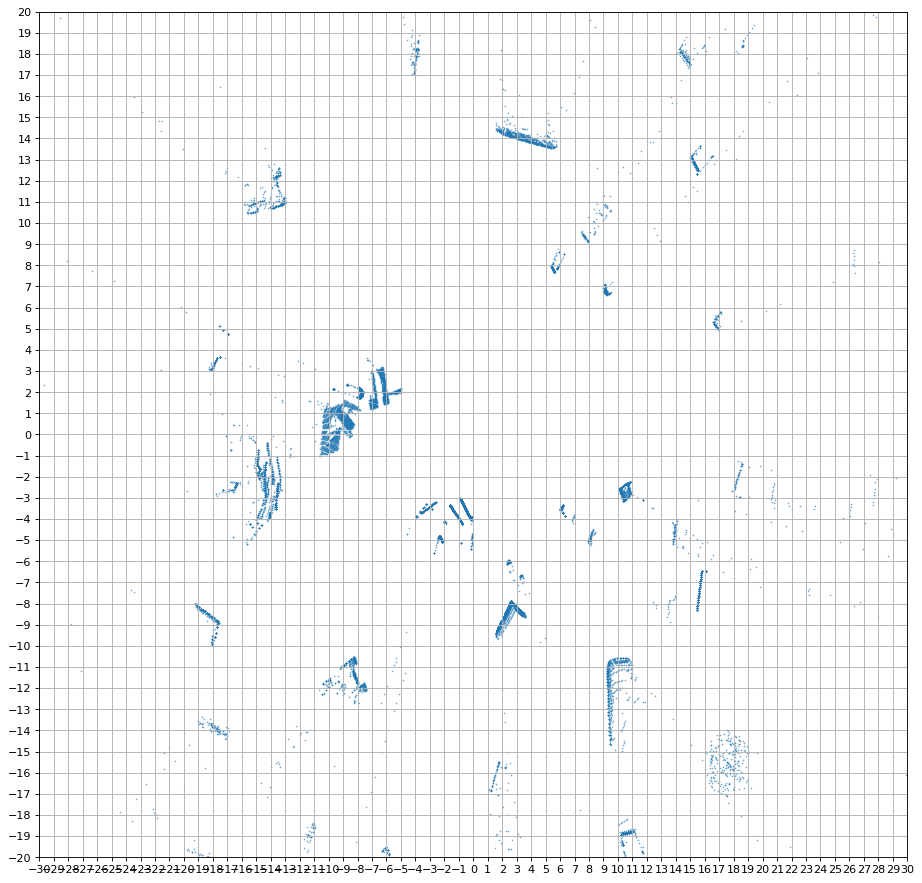

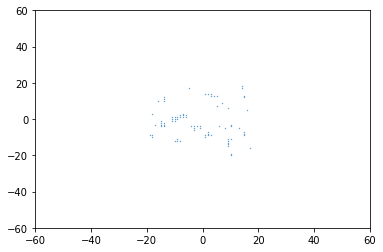

In [6]:
setAgg =transformToSuperCells(allData[0]['Z'], allData[0]['X'])


grid_size= 1
fig = plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.gca()
ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))
# plt.grid()
plt.scatter(allData[0]['Z'], allData[0]['X'], s=0.1)
plt.xlim(-30, 30)
plt.ylim(-20, 20)
plt.grid()
plt.show()   


# print(allData[0]['X'].size, allData[0]['Z'].size)
# print(setAgg.size, setAgg.size)
# print(setAgg[:,0])
# print(np.vsplit(setAgg, [2]))


plt.scatter(setAgg[:,0], setAgg[:,1], s=0.1)
plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.show()

In [7]:
#
def doClustering(data, max_cluster_number=50, Elbow_ratio = 1.2):
    Sum_of_squared_distances = []

    
    for k in range(3, max_cluster_number):
        
        if(data.size <= k):
            break
        km = KMeans(n_clusters=k, max_iter=100, random_state=0)
        km = km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)

    numberOfClusters = 1
    for i in range(1, len(Sum_of_squared_distances)):
        ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
        # elbow ratio is an important parameter. 
        if(ratio < Elbow_ratio):
            numberOfClusters=i+1
            break
    # final run with large iterations 
    km = KMeans(n_clusters=numberOfClusters, max_iter=100, random_state=0)
    km = km.fit(data)
    # print(km.cluster_centers_)
    
    return numberOfClusters, km.cluster_centers_

In [8]:
setAgg =transformToSuperCells(allData[0]['Z'], allData[0]['X'])
numberOfClusters, cluster_centers = doClustering(setAgg)

print(numberOfClusters)

8


In [13]:
for i in range(20):
    setAgg =transformToSuperCells(allData[i]['Z'], allData[i]['X'], cuttOff=20, cellSize=1)
    # print("Sample size is: ", setAgg.size)
    
    # plt.scatter(setAgg[:,0], setAgg[:,1], s=0.1)
    # plt.xlim(-30, 30)
    # plt.ylim(-30, 30)
    # plt.show()
    
    # setAgg = np.array(list(zip(allData[i]['Z'], allData[i]['X'])))
    numberOfClusters, cluster_centers = doClustering(setAgg , Elbow_ratio = 1.05)
    print("Data size: ", allData[i]['Z'].size, "Sample size: ", setAgg.shape, "Number Of Clusters: ", numberOfClusters, ", Difference is: ", numOfObjects[i] - numberOfClusters)
    print(" ------------------ ")

Data size:  13678 Sample size:  (111, 2) Number Of Clusters:  18 , Difference is:  15
 ------------------ 
Data size:  13320 Sample size:  (128, 2) Number Of Clusters:  27 , Difference is:  -2
 ------------------ 
Data size:  11508 Sample size:  (106, 2) Number Of Clusters:  25 , Difference is:  0
 ------------------ 
Data size:  11178 Sample size:  (68, 2) Number Of Clusters:  26 , Difference is:  -9
 ------------------ 
Data size:  7446 Sample size:  (69, 2) Number Of Clusters:  24 , Difference is:  -8
 ------------------ 
Data size:  11815 Sample size:  (119, 2) Number Of Clusters:  32 , Difference is:  2
 ------------------ 
Data size:  10462 Sample size:  (94, 2) Number Of Clusters:  25 , Difference is:  10
 ------------------ 
Data size:  7623 Sample size:  (67, 2) Number Of Clusters:  28 , Difference is:  -8
 ------------------ 
Data size:  11314 Sample size:  (87, 2) Number Of Clusters:  23 , Difference is:  -6
 ------------------ 
Data size:  12920 Sample size:  (107, 2) Numbe